In [1]:
#from nbindex import floating
#floating.tableofcontent()

## Harry Potter

The `data/hpattributes.txt` contains the data of the characters in all the Harry Potter books. (id, schoolyear, gender, house) without their named.
The name are in `data/hpnames.txt` with the proper `id`-s. 

(Gender: 1 - male, 2 - female; Houses: 1 - Gryffindor, 2 - Hufflepuff, 3 - Ravenclaw, 4 - Slytherin)

- Merge the two `DataFrames` with the help of the `id`-s and print the students belonging to Ravenclaw ordered by their age 

- What is the average age of the students of Gryffindor in 2017? (Students start their studies at the age of 11 )


### Solution

In [2]:
import pandas as pd

In [3]:
Datasets = '/home/course/01-data/'

In [4]:
attr_file=Datasets+'//hpattributes.txt'
name_file=Datasets+'//hpnames.txt'

In [5]:
# Check the first few lines with the head bash command
!head -n 3 $attr_file $name_file

==> /home/course/public/01-data///hpattributes.txt <==




==> /home/course/public/01-data///hpnames.txt <==





In [6]:
# read data

attr = pd.read_csv(attr_file, sep='\t', skiprows=1, names=['id', 'year', 'gender', 'house'])
names = pd.read_csv(name_file, sep='\t', skiprows=1, names=['id', 'name'])

In [7]:
# merge DataFrames

df = attr.merge(names, how='inner', left_on='id', right_on='id')

In [8]:
# age of students of to Ravenclaw in order

df[df['house']==3].sort_values('year', ascending=False)

,id,year,gender,house,name
45,46,1994,2,3,Orla Quirke
58,59,1994,1,3,Stewart Ackerley
34,35,1992,2,3,Luna Lovegood
3,4,1991,1,3,Anthony Goldstein
36,37,1991,2,3,Mandy Brocklehurst
39,40,1991,1,3,Michael Corner
47,48,1991,2,3,Padma Patil
60,61,1991,1,3,Terry Boot
7,8,1990,2,3,Cho Chang
14,15,1990,1,3,Eddie Carmichael


In [9]:
# average age of Gryffindor pupils

print('A Griffendélesek átlagos életkora jelenleg: ' + str(2017-df[df['house']==1]['year'].mean()+11) + ' év')

A Griffendélesek átlagos életkora jelenleg: 37.039999999999964 év


In [10]:
# The 5 most typical ages in the list 

df.groupby('year').count().sort_values('id', ascending=False).head(n=5)

,id,gender,house,name
year,,,,
1991,26,26,26,26
1994,10,10,10,10
1989,9,9,9,9
1990,5,5,5,5
1987,3,3,3,3


## Supernovae

 - Download the file http://supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt and load it into a pandas dataframe!
   - Let the label of the columns be: _name_, _redshift_, _distmod_, _distmoderr_, _lowmassgal_ !
   - Leave out comments (rows starting with '#')!
 - Plot with scatter the redshift-distmod relation!
 - Calculate the mean and the standard deviation of the _distmod_ for the follwoing _redshift_ intervals: [-0.05;0.05], [0.05;0.15], [0.15;0.25] ... [1.35;1.45] with  **pandas groupby** !
 - Plot the averages and the standard deviation as an errorbar!
 
 
We should get similar to these plots: 

![image](https://user-images.githubusercontent.com/24739689/55803772-498fa880-5adb-11e9-933b-17a334d2d14c.png)

### Solution

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
datafile=Datasets+'//SCPUnion2.1_mu_vs_z.txt'

In [13]:
# Check the first few lines with the head bash command
!head $datafile

# alpha 0.121851859725
# beta 2.46569277393
# delta -0.0363405630486
# M(h=0.7, statistical only) -19.3182761161
# M(h=0.7, with systematics) -19.3081547178
1993ah	0.028488	35.3465833928	0.223905932998	0.128418942246
1993ag	0.050043	36.6823679154	0.166828851413	0.128418942246
1993o	0.052926	36.8176912545	0.1557559148	0.128418942246
1993b	0.070086	37.4467365424	0.158466934433	0.128418942246
1992bs	0.062668	37.4834093505	0.156099434739	0.128418942246


In [14]:
column_names = ['name', 'redshift', 'distmod', 'distmoderr', 'lowmassgal'] # read data
df = pd.read_csv(datafile, comment = '#', sep = '\t', names =column_names)


In [15]:
ranges = np.arange(-0.05, 1.5, 0.1)# intervals

# group by intervals and calculate the mean and standard deviation for the groups
average_distmod = df.groupby(pd.cut(df['redshift'], ranges))['distmod'].mean()
std_distmod = df.groupby(pd.cut(df['redshift'], ranges))['distmod'].std()

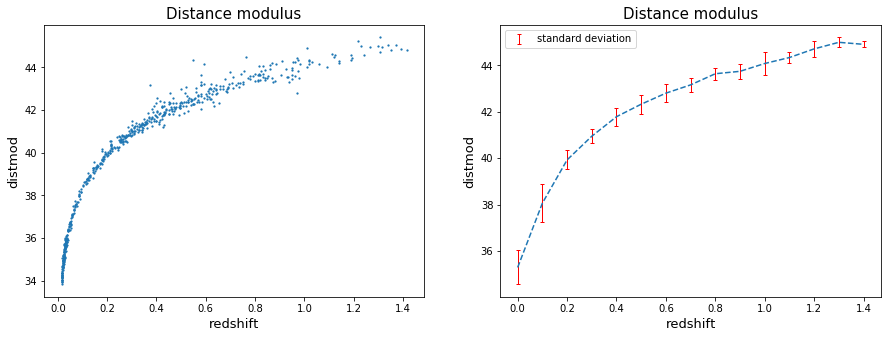

In [16]:
# plot
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].set_title('Distance modulus', size = 15)
ax[0].set_xlabel('redshift', size = 13)
ax[0].set_ylabel('distmod', size =13)
ax[1].set_title('Distance modulus', size = 15)
ax[1].set_xlabel('redshift', size = 13)
ax[1].set_ylabel('distmod', size = 13)

ax[0].scatter(df['redshift'], df['distmod'], s = 1.5)
ax[1].errorbar(ranges[:-1] + 0.05, np.array(average_distmod), np.array(std_distmod), elinewidth=1, capsize = 2,linestyle = '', color = 'r', label = 'standard deviation')
ax[1].plot(ranges[:-1] + 0.05, np.array(average_distmod), linestyle = '--')
ax[1].legend()